In [1]:
import pandas as pd 
df = pd.read_csv("C:/Users/Shrii/Documents/Internship Program/Reference Material/Jain Internship Project/DS - Python + SQL + ETL - Healthcare Census/Data/census_2011.csv")

In [2]:
df.head()

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,1048.0,...,94.0,588.0,71.0,101.0,172.0,74.0,10.0,84.0,15.0,1119.0
1,2,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,NaN,...,126.0,562.0,72.0,89.0,161.0,96.0,28.0,124.0,18.0,1066.0
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,488.0,...,46.0,122.0,15.0,22.0,NaN,20.0,NaN,NaN,17.0,242.0
3,4,JAMMU AND KASHMIR,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,18.0,...,27.0,114.0,12.0,18.0,30.0,19.0,3.0,22.0,7.0,214.0
4,5,JAMMU AND KASHMIR,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,556.0,...,78.0,346.0,35.0,50.0,85.0,59.0,8.0,67.0,12.0,629.0


In [3]:
df.shape

(640, 118)

# Problem statement 1

In [4]:
columns_list = df.columns.tolist()
print(columns_list)

['District code', 'State name', 'District name', 'Population', 'Male', 'Female', 'Literate', 'Male_Literate', 'Female_Literate', 'SC', 'Male_SC', 'Female_SC', 'ST', 'Male_ST', 'Female_ST', 'Workers', 'Male_Workers', 'Female_Workers', 'Main_Workers', 'Marginal_Workers', 'Non_Workers', 'Cultivator_Workers', 'Agricultural_Workers', 'Household_Workers', 'Other_Workers', 'Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains', 'Others_Religions', 'Religion_Not_Stated', 'LPG_or_PNG_Households', 'Housholds_with_Electric_Lighting', 'Households_with_Internet', 'Households_with_Computer', 'Rural_Households', 'Urban_Households', 'Households', 'Below_Primary_Education', 'Primary_Education', 'Middle_Education', 'Secondary_Education', 'Higher_Education', 'Graduate_Education', 'Other_Education', 'Literate_Education', 'Illiterate_Education', 'Total_Education', 'Age_Group_0_29', 'Age_Group_30_49', 'Age_Group_50', 'Age not stated', 'Households_with_Bicycle', 'Households_with_Car_Jeep_Van', 'Hou

In [5]:
columns_to_keep = ['State name',
                   'District name',
                   'Population',
                   'Male',
                   'Female',
                   'Literate',
                   'Male_Literate',
                   'Female_Literate',
                   'Rural_Households',
                   'Urban_Households',
                   'Households',
                   'Age_Group_0_29',
                   'Age_Group_30_49',
                   'Age_Group_50',
                   'Age not stated']

In [6]:
'''df = df.drop(df.loc[:, ~df.columns.isin(columns_to_keep)],axis=1)
df.head()
#other ways to do this'''


df = df[columns_to_keep]
df.head()

,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,Rural_Households,Urban_Households,Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated
0,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,JAMMU AND KASHMIR,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,JAMMU AND KASHMIR,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,JAMMU AND KASHMIR,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0


# Problem statement 2

In [7]:
columns_to_rename = {'State name':'State/UT',
                     'District name':'District',
                     'Male_Literate':'Literate_Male',
                     'Female_Literate':'Literate_Female',
                     'Rural_Households':'Households_Rural',
                     'Urban_Households':'Households_Urban',
                     'Age_Group_0_29':'Young_and_Adult',
                     'Age_Group_30_49':'Middle_Aged',
                     'Age_Group_50':'Senior_Citizen',
                     'Age not stated':'Age_Not_Stated'}

In [8]:
df.rename(columns=columns_to_rename,inplace=True)

In [9]:
df.head()

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,JAMMU AND KASHMIR,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,JAMMU AND KASHMIR,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,JAMMU AND KASHMIR,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0


# problem statement 3

In [10]:
df['State/UT'] = df['State/UT'].str.title().replace(r'\bAnd\b','and',regex=True)
#statement 3

In [11]:
df.head()


,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu and Kashmir,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Jammu and Kashmir,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,Jammu and Kashmir,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu and Kashmir,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0


# Problem statement 4

In [12]:
with open('C:/Users/Shrii/Documents/Internship Program/Reference Material/Jain Internship Project/DS - Python + SQL + ETL - Healthcare Census/Data/Telangana.txt','r') as file:
    districts_telangana = [line.strip() for line in file]


In [13]:
districts_laddakh = ['Leh(Ladakh)','Kargil']

In [14]:


df.loc[df['District'].isin(districts_telangana),'State/UT'] = 'Telangana'
df.loc[df['District'].isin(districts_laddakh),'State/UT'] = 'Laddakh'
df.head()

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu and Kashmir,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Laddakh,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,Laddakh,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu and Kashmir,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0


In [15]:
df['State/UT'].unique()

array(['Jammu and Kashmir', 'Laddakh', 'Himachal Pradesh', 'Punjab',
       'Chandigarh', 'Uttarakhand', 'Haryana', 'Nct Of Delhi',
       'Rajasthan', 'Uttar Pradesh', 'Bihar', 'Sikkim',
       'Arunachal Pradesh', 'Nagaland', 'Manipur', 'Mizoram', 'Tripura',
       'Meghalaya', 'Assam', 'West Bengal', 'Jharkhand', 'Orissa',
       'Chhattisgarh', 'Madhya Pradesh', 'Gujarat', 'Daman and Diu',
       'Dadra and Nagar Haveli', 'Maharashtra', 'Telangana',
       'Andhra Pradesh', 'Karnataka', 'Goa', 'Lakshadweep', 'Kerala',
       'Tamil Nadu', 'Pondicherry', 'Andaman and Nicobar Islands'],
      dtype=object)

# problem statement 5

In [16]:
missing_data_before = (df.isnull().sum()/len(df)) * 100
missing_data_before
import matplotlib.pyplot as plt

In [17]:
df['Population'].fillna(df['Male'] + df['Female'], inplace=True)
df['Male'].fillna(df['Population'] + df['Female'], inplace=True)
df['Female'].fillna(df['Population'] + df['Male'], inplace=True)

df['Literate'].fillna(df['Literate_Male'] + df['Literate_Female'], inplace=True)
df['Literate_Male'].fillna(df['Literate'] + df['Literate_Female'], inplace=True)
df['Literate_Female'].fillna(df['Literate'] + df['Literate_Male'], inplace=True)

df['Population'].fillna(df['Young_and_Adult'] + df['Middle_Aged'] + df['Senior_Citizen'] + df['Age_Not_Stated'], inplace=True)
df['Young_and_Adult'].fillna(df['Population'] - df['Middle_Aged'] - df['Senior_Citizen'] - df['Age_Not_Stated'], inplace = True)
df['Middle_Aged'].fillna(df['Population'] - df['Young_and_Adult'] - df['Senior_Citizen'] - df['Age_Not_Stated'], inplace = True)
df['Senior_Citizen'].fillna(df['Population'] - df['Young_and_Adult'] - df['Middle_Aged'] - df['Age_Not_Stated'], inplace= True)
df['Age_Not_Stated'].fillna(df['Population'] - df['Young_and_Adult'] - df['Middle_Aged'] - df['Senior_Citizen'],inplace= True)

df['Households'].fillna(df['Households_Rural'] + df['Households_Urban'],inplace=True)
df['Households_Rural'].fillna(df['Households'] - df['Households_Urban'],inplace=True)
df['Households_Urban'].fillna(df['Households'] - df['Households_Rural'],inplace=True)

In [18]:
filled_data_after = (df.isnull().sum()/len(df)) * 100
filled_data_after

State/UT            0.00000
District            0.00000
Population          0.15625
Male                0.15625
Female              0.00000
Literate            0.31250
Literate_Male       0.31250
Literate_Female     0.31250
Households_Rural    0.93750
Households_Urban    0.46875
Households          0.78125
Young_and_Adult     0.62500
Middle_Aged         0.93750
Senior_Citizen      1.25000
Age_Not_Stated      0.46875
dtype: float64

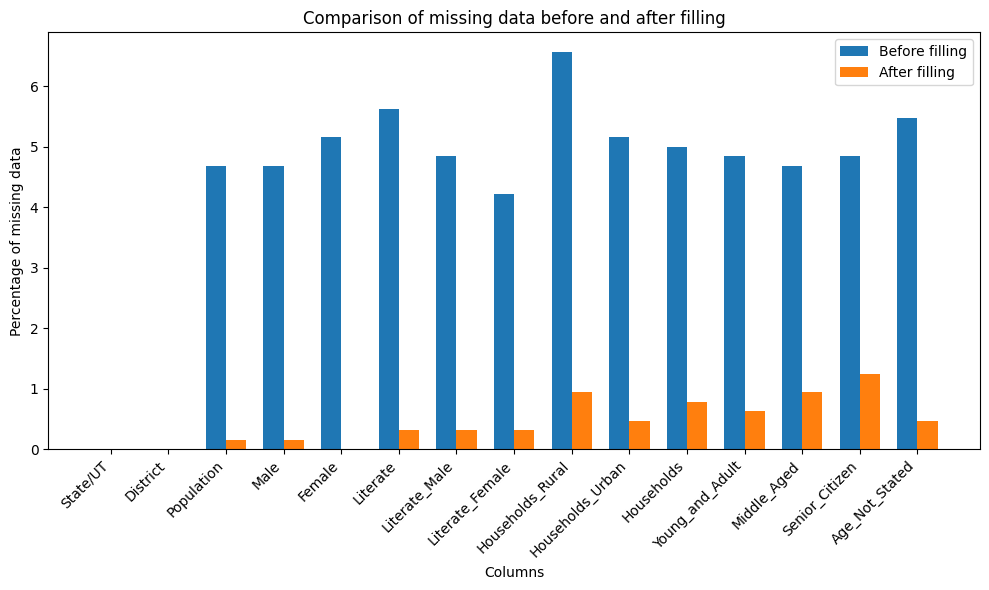

In [19]:
plt.figure(figsize=(10,6))
bar_width = 0.35
index = range(len(df.columns))

plt.bar(index, missing_data_before, bar_width, label = "Before filling")
plt.bar([i + bar_width for i in index], filled_data_after, bar_width, label = "After filling")

plt.xlabel('Columns')
plt.ylabel('Percentage of missing data')
plt.title('Comparison of missing data before and after filling')
plt.xticks([i + bar_width / 2 for i in index], df.columns, rotation = 45, ha= 'right')
plt.legend()

plt.tight_layout()
plt.show()

# problem statement 6


In [20]:
import os

clean_data_folder = "Clean_Data"
if not os.path.exists(clean_data_folder):
    os.makedirs(clean_data_folder)

df.to_csv(os.path.join(clean_data_folder,"census.csv"), index=False)
print("Updated dataset saved to 'census.csv' in the '{}' folder.".format(clean_data_folder))

Updated dataset saved to 'census.csv' in the 'Clean_Data' folder.


# problem statement 7

In [21]:
housing_data = pd.read_csv("C:/Users/Shrii/Documents/Internship Program/Reference Material/Jain Internship Project/DS - Python + SQL + ETL - Healthcare Census/Data/housing.csv")
housing_data.head()

,State Code,State Name,District Code,District Name,Tehsil Code,Tehsil Name,Town Code/Village code,Ward No,Area Name,Rural/Urban,...,Contition_T_Total,Contition_T_Good,Contition_T_Livable,Contition_T_Dilapidated,Contition_R_Total,Residence_Good,Residence_Livable,Residence_Dilapidated,Residence_cum_other,Residence_cum_Good
0,1,JAMMU & KASHMIR,1,Kupwara,0,Kupwara,0,0,District - Kupwara,Rural,...,100,33.6,58.1,8.3,90.9,32.7,51.0,7.2,9.1,1.0
1,1,JAMMU & KASHMIR,1,Kupwara,0,Kupwara,0,0,District - Kupwara,Total,...,100,34.8,57.3,7.9,91.0,33.8,50.2,6.9,9.0,0.9
2,1,JAMMU & KASHMIR,1,Kupwara,0,Kupwara,0,0,District - Kupwara,Urban,...,100,45.7,49.5,4.8,91.8,45.0,42.2,4.5,8.2,0.7
3,1,JAMMU & KASHMIR,2,Badgam,0,Badgam,0,0,District - Badgam,Rural,...,100,49.7,46.3,3.9,97.2,49.0,44.5,3.7,2.8,0.7
4,1,JAMMU & KASHMIR,2,Badgam,0,Badgam,0,0,District - Badgam,Total,...,100,51.6,44.7,3.8,97.3,50.8,43.0,3.5,2.7,0.8


In [22]:
def format_state_name(state_name):
    return " ".join(word.title() for word in state_name.split()).replace(" & ", " and ")

housing_data["State Name"] = housing_data["State Name"].apply(format_state_name)
housing_data.columns

Index(['State Code', 'State Name', 'District Code', 'District Name',
       'Tehsil Code', 'Tehsil Name', 'Town Code/Village code', 'Ward No',
       'Area Name', 'Rural/Urban',
       ...
       'Contition_T_Total', 'Contition_T_Good', 'Contition_T_Livable',
       'Contition_T_Dilapidated', 'Contition_R_Total', 'Residence_Good',
       'Residence_Livable', 'Residence_Dilapidated', 'Residence_cum_other',
       'Residence_cum_Good'],
      dtype='object', length=156)

In [23]:
cols_to_keep = ['State Name','District Name','Rural/Urban','Total Number of households','Total Number of Livable','Total Number of Dilapidated','Latrine_premise']
housing_data = housing_data[cols_to_keep]
housing_data.head()

,State Name,District Name,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
0,Jammu and Kashmir,Kupwara,Rural,100,58.1,8.3,48.9
1,Jammu and Kashmir,Kupwara,Total,100,57.3,7.9,50.9
2,Jammu and Kashmir,Kupwara,Urban,100,49.5,4.8,70.2
3,Jammu and Kashmir,Badgam,Rural,100,46.3,3.9,83.3
4,Jammu and Kashmir,Badgam,Total,100,44.7,3.8,84.3


In [24]:
housing_data.rename(columns ={'District Name':'District'},inplace=True)
housing_data.head()

,State Name,District,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
0,Jammu and Kashmir,Kupwara,Rural,100,58.1,8.3,48.9
1,Jammu and Kashmir,Kupwara,Total,100,57.3,7.9,50.9
2,Jammu and Kashmir,Kupwara,Urban,100,49.5,4.8,70.2
3,Jammu and Kashmir,Badgam,Rural,100,46.3,3.9,83.3
4,Jammu and Kashmir,Badgam,Total,100,44.7,3.8,84.3


In [25]:
grouped_data = housing_data.groupby('State Name')['District'].apply(list).reset_index()

merged_data = pd.merge(housing_data,grouped_data, on='State Name', how='left')
merged_data

,State Name,District_x,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise,District_y
0,Jammu and Kashmir,Kupwara,Rural,100,58.1,8.3,48.9,"[Kupwara, Kupwara, Kupwara, Badgam, Badgam, Ba..."
1,Jammu and Kashmir,Kupwara,Total,100,57.3,7.9,50.9,"[Kupwara, Kupwara, Kupwara, Badgam, Badgam, Ba..."
2,Jammu and Kashmir,Kupwara,Urban,100,49.5,4.8,70.2,"[Kupwara, Kupwara, Kupwara, Badgam, Badgam, Ba..."
3,Jammu and Kashmir,Badgam,Rural,100,46.3,3.9,83.3,"[Kupwara, Kupwara, Kupwara, Badgam, Badgam, Ba..."
4,Jammu and Kashmir,Badgam,Total,100,44.7,3.8,84.3,"[Kupwara, Kupwara, Kupwara, Badgam, Badgam, Ba..."
...,...,...,...,...,...,...,...,...
1903,Andaman and Nicobar Islands,North & Middle Andaman,Total,100,44.6,2.8,48.3,"[Nicobars, Nicobars, North & Middle Andaman, ..."
1904,Andaman and Nicobar Islands,North & Middle Andaman,Urban,100,55.9,6.6,56.1,"[Nicobars, Nicobars, North & Middle Andaman, ..."
1905,Andaman and Nicobar Islands,South Andaman,Rural,100,33.5,3.5,64.7,"[Nicobars, Nicobars, North & Middle Andaman, ..."
1906,Andaman and Nicobar Islands,South Andaman,Total,100,26.4,2.2,78.3,"[Nicobars, Nicobars, North & Middle Andaman, ..."


In [26]:
merged = pd.merge(housing_data, df,on="District", how="left",)
merged.head()

,State Name,District,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise,State/UT,Population,Male,...,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu and Kashmir,Kupwara,Rural,100,58.1,8.3,48.9,Jammu and Kashmir,870354.0,474190.0,...,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu and Kashmir,Kupwara,Total,100,57.3,7.9,50.9,Jammu and Kashmir,870354.0,474190.0,...,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0
2,Jammu and Kashmir,Kupwara,Urban,100,49.5,4.8,70.2,Jammu and Kashmir,870354.0,474190.0,...,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0
3,Jammu and Kashmir,Badgam,Rural,100,46.3,3.9,83.3,Jammu and Kashmir,753745.0,1109449.0,...,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
4,Jammu and Kashmir,Badgam,Total,100,44.7,3.8,84.3,Jammu and Kashmir,753745.0,1109449.0,...,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0


In [27]:
merged = merged[merged["Rural/Urban"] != "Total"]
merged.head()

,State Name,District,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise,State/UT,Population,Male,...,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu and Kashmir,Kupwara,Rural,100,58.1,8.3,48.9,Jammu and Kashmir,870354.0,474190.0,...,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0
2,Jammu and Kashmir,Kupwara,Urban,100,49.5,4.8,70.2,Jammu and Kashmir,870354.0,474190.0,...,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0
3,Jammu and Kashmir,Badgam,Rural,100,46.3,3.9,83.3,Jammu and Kashmir,753745.0,1109449.0,...,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
5,Jammu and Kashmir,Badgam,Urban,100,33.8,2.6,90.4,Jammu and Kashmir,753745.0,1109449.0,...,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
6,Jammu and Kashmir,Leh(Ladakh),Rural,100,51.5,2.1,88.1,Laddakh,133487.0,78971.0,...,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,21019.0,250.0


In [28]:
missing_data_before = (merged.isnull().sum()/len(merged)) *100
missing_data_before

State Name                     0.000000
District                       0.000000
Rural/Urban                    0.000000
Total Number of households     0.000000
Total Number of Livable        0.000000
Total Number of Dilapidated    0.000000
Latrine_premise                0.000000
State/UT                       0.696594
Population                     0.851393
Male                           0.851393
Female                         0.696594
Literate                       1.006192
Literate_Male                  1.006192
Literate_Female                1.006192
Households_Rural               1.625387
Households_Urban               1.160991
Households                     1.470588
Young_and_Adult                1.315789
Middle_Aged                    1.625387
Senior_Citizen                 1.934985
Age_Not_Stated                 1.160991
dtype: float64

In [29]:
housing_rural = housing_data[housing_data['Rural/Urban'] == 'Rural']
housing_urban = housing_data[housing_data['Rural/Urban'] == 'Urban']
housing_rural

,State Name,District,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
0,Jammu and Kashmir,Kupwara,Rural,100,58.1,8.3,48.9
3,Jammu and Kashmir,Badgam,Rural,100,46.3,3.9,83.3
6,Jammu and Kashmir,Leh(Ladakh),Rural,100,51.5,2.1,88.1
9,Jammu and Kashmir,Kargil,Rural,100,73.3,3.5,96.8
12,Jammu and Kashmir,Punch,Rural,100,59.5,2.4,13.7
...,...,...,...,...,...,...,...
1892,Puducherry,Puducherry,Rural,100,31.9,2.6,35.8
1897,Puducherry,Karaikal,Rural,100,36.8,2.1,47.6
1900,Andaman and Nicobar Islands,Nicobars,Rural,100,23.8,1.2,80.9
1902,Andaman and Nicobar Islands,North & Middle Andaman,Rural,100,44.3,2.7,48.0


In [30]:
merged_rural = pd.merge(df,housing_rural,on='District', how='left')
merged_urban = pd.merge(df,housing_urban,on='District', how='left')


In [31]:
# Calculating absolute values for rural data
merged_rural['Households_Rural_Dilapidated'] = (merged_rural['Total Number of Dilapidated'] / 100) * merged_rural['Households_Rural']
merged_rural['Households_Rural_Toilet_Premise'] = (merged_rural['Latrine_premise'] / 100) * merged_rural['Households_Rural']

# Calculating absolute values for urban data
merged_urban['Households_Urban_Dilapidated'] = (merged_urban['Total Number of Dilapidated'] / 100) * merged_urban['Households_Urban']
merged_urban['Households_Urban_Toilet_Premise'] = (merged_urban['Latrine_premise'] / 100) * merged_urban['Households_Urban']

# Selecting relevant columns for final DataFrame
final_columns_rural = ['State Name','District', 'Households_Rural', 'Households_Rural_Dilapidated', 'Households_Rural_Toilet_Premise']
final_columns_urban = ['State Name','District', 'Households_Urban', 'Households_Urban_Dilapidated', 'Households_Urban_Toilet_Premise']

final_rural = merged_rural[final_columns_rural]
final_urban = merged_urban[final_columns_urban]

# Merging rural and urban data
final_data = pd.merge(final_rural, final_urban, on='District', how='outer')

In [32]:
final_rural[final_rural['State Name'].isnull()]

,State Name,District,Households_Rural,Households_Rural_Dilapidated,Households_Rural_Toilet_Premise
24,NaN,Lahul AND Spiti,17434.0,NaN,NaN
95,NaN,New Delhi,0.0,NaN,NaN
96,NaN,Central,0.0,NaN,NaN
347,NaN,Kolkata,0.0,NaN,NaN
504,NaN,Dadra AND Nagar Haveli,48221.0,NaN,NaN
527,NaN,Mumbai Suburban,0.0,NaN,NaN
528,NaN,Mumbai,0.0,NaN,NaN
546,NaN,Hyderabad,0.0,NaN,NaN
598,NaN,Lakshadweep,5289.0,NaN,NaN
614,NaN,Chennai,0.0,NaN,NaN


In [33]:

clean_data_folder = "Clean_Data"
if not os.path.exists(clean_data_folder):
    os.makedirs(clean_data_folder)

final_data.to_csv(os.path.join(clean_data_folder, "housing.csv"), index=False)

In [34]:
# if district  data in one file and not the other 
missing_districts_housing = set(housing_data['District']) - set(df['District'])
missing_districts_census = set(df['District']) - set(housing_data['District'])

if missing_districts_housing:
    print("District data present in housing data but not in census data:", missing_districts_housing)
if missing_districts_census:
    print("District data present in census data but not in housing data:", missing_districts_census)

District data present in housing data but not in census data: {'LAKSHADWEEP', 'Dadra & Nagar Haveli', 'Puducherry', 'North  & Middle Andaman', 'Lahul & Spiti'}
District data present in census data but not in housing data: {'Lahul AND Spiti', 'Dadra AND Nagar Haveli', 'North  AND Middle Andaman', 'PONDICHERRY', 'Lakshadweep'}


# Problem Statement 8

In [35]:
# Load the data
housing_data_1 = pd.read_csv("Clean_Data/housing.csv")

In [44]:
housing_data_1.columns.to_list()

['State Name_x',
 'District',
 'Households_Rural',
 'Households_Rural_Dilapidated',
 'Households_Rural_Toilet_Premise',
 'State Name_y',
 'Households_Urban',
 'Households_Urban_Dilapidated',
 'Households_Urban_Toilet_Premise']

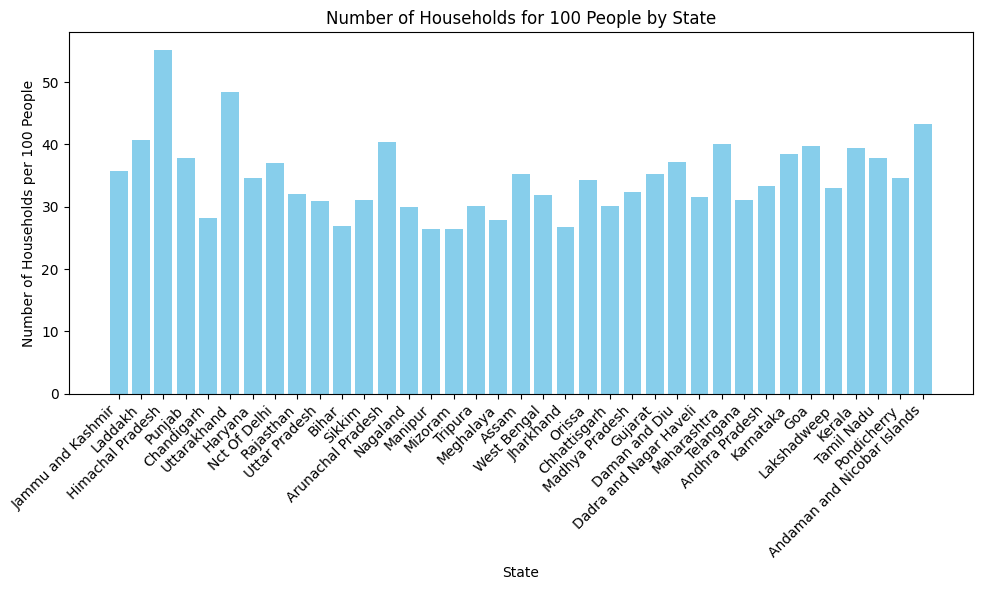

In [36]:
# Calculate number of households for 100 people
df['Households_Per_100_People'] = (df['Households'] / df['Population']) * 100

# Visualize the data

# 1. Number of households for 100 people
plt.figure(figsize=(10, 6))
plt.bar(df['State/UT'], df['Households_Per_100_People'], color='skyblue')
plt.title('Number of Households for 100 People by State')
plt.xlabel('State')
plt.ylabel('Number of Households per 100 People')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [37]:
df.columns.tolist()
final_census = ['State/UT','District','Population','Households_Rural','Households_Urban','Households']

df5 = df[final_census]
df5

,State/UT,District,Population,Households_Rural,Households_Urban,Households
0,Jammu and Kashmir,Kupwara,870354.0,158438.0,23226.0,181664.0
1,Jammu and Kashmir,Badgam,753745.0,160649.0,27190.0,187839.0
2,Laddakh,Leh(Ladakh),133487.0,36920.0,17474.0,54394.0
3,Laddakh,Kargil,140802.0,40370.0,7774.0,48144.0
4,Jammu and Kashmir,Punch,476835.0,132139.0,15269.0,147408.0
...,...,...,...,...,...,...
635,Pondicherry,Mahe,41816.0,0.0,12110.0,12110.0
636,Pondicherry,Karaikal,200222.0,35618.0,33715.0,69333.0
637,Andaman and Nicobar Islands,Nicobars,36842.0,15958.0,0.0,15958.0
638,Andaman and Nicobar Islands,North AND Middle Andaman,105597.0,39091.0,1094.0,40185.0


In [38]:
final_merge= pd.merge(housing_data, df5, on='District', how='left' )
final_merge.columns.tolist()

['State Name',
 'District',
 'Rural/Urban',
 'Total Number of households',
 'Total Number of Livable',
 'Total Number of Dilapidated',
 'Latrine_premise',
 'State/UT',
 'Population',
 'Households_Rural',
 'Households_Urban',
 'Households']

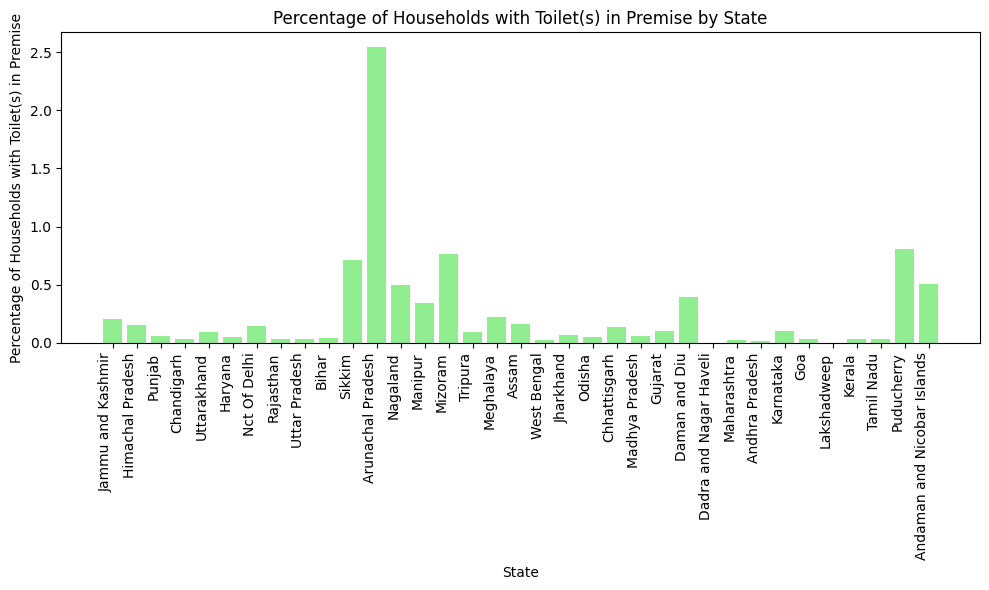

In [39]:
# Calculate percentage of households with toilet(s) in premise
final_merge['Toilet_Premise_Percentage'] = (final_merge['Latrine_premise']) / final_merge['Households'] * 100

# Visualize the data
# 2. Percentage of households with toilet(s) in premise
plt.figure(figsize=(10, 6))
plt.bar(final_merge['State Name'], final_merge['Toilet_Premise_Percentage'], color='lightgreen')
plt.title('Percentage of Households with Toilet(s) in Premise by State')
plt.xlabel('State')
plt.ylabel('Percentage of Households with Toilet(s) in Premise')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

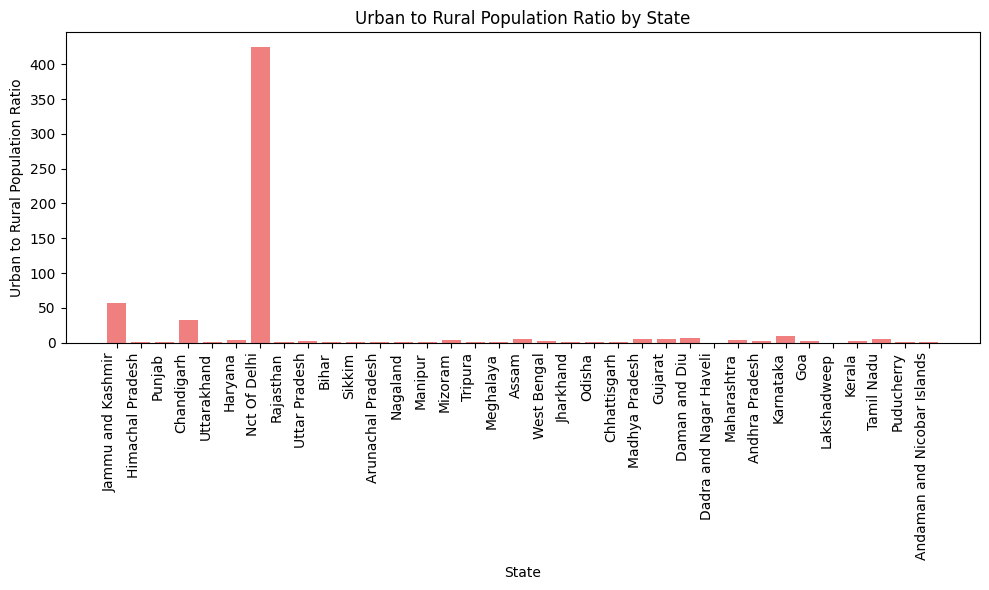

In [40]:
# Calculate urban to rural population ratio
final_merge['Rural_to_Rural_Population_Ratio'] = final_merge['Households_Urban'] / final_merge['Households_Rural']
# Visualize the data
# 3. Urban to rural population ratio
plt.figure(figsize=(10, 6))
plt.bar(final_merge['State Name'], final_merge['Rural_to_Rural_Population_Ratio'], color='lightcoral')
plt.title('Urban to Rural Population Ratio by State')
plt.xlabel('State')
plt.ylabel('Urban to Rural Population Ratio')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

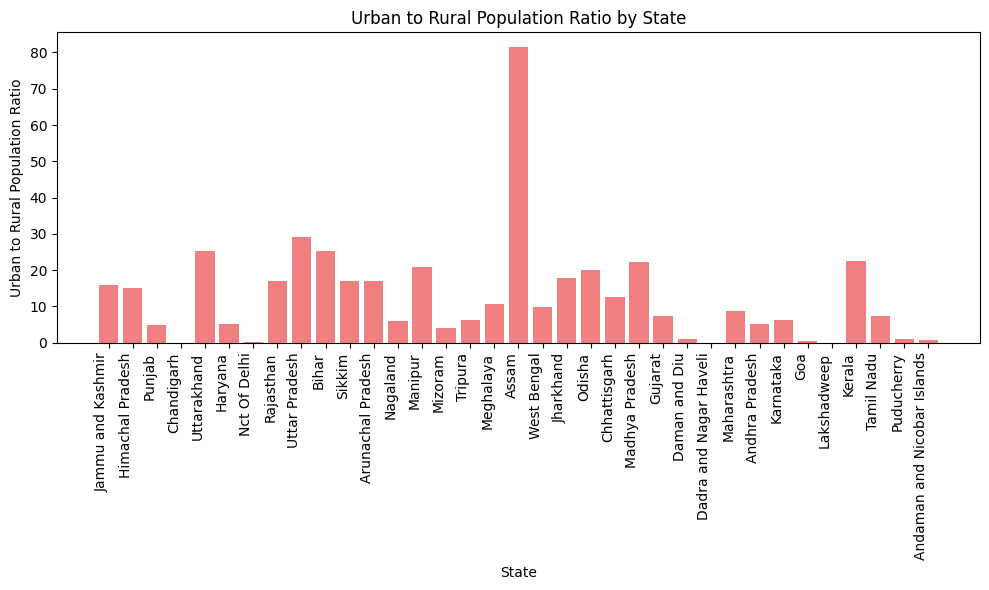

In [41]:
# Calculate urban to rural population ratio
final_merge['Rural_to_Rural_Population_Ratio'] = final_merge['Households_Rural'] / final_merge['Households_Urban']
# Visualize the data
# 3. Urban to rural population ratio
plt.figure(figsize=(10, 6))
plt.bar(final_merge['State Name'], final_merge['Rural_to_Rural_Population_Ratio'], color='lightcoral')
plt.title('Urban to Rural Population Ratio by State')
plt.xlabel('State')
plt.ylabel('Urban to Rural Population Ratio')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [42]:
housing_data.columns.tolist()

['State Name',
 'District',
 'Rural/Urban',
 'Total Number of households',
 'Total Number of Livable',
 'Total Number of Dilapidated',
 'Latrine_premise']

In [43]:
housing_data.columns.tolist()

['State Name',
 'District',
 'Rural/Urban',
 'Total Number of households',
 'Total Number of Livable',
 'Total Number of Dilapidated',
 'Latrine_premise']